# 形态学转换 

形态学转换是基于图像形状的一些简单操作。它通常在二进制图像上执行。它需要两个输入参数，一个是我们的原始图像，第二个是称为结构元素或核，它决定了操作的性质。腐蚀和膨胀是两个基本的形态学运算符。然后它的变体形式如开运算，闭运算，梯度等也发挥作用。我们将在以下图片的帮助下逐一看到它们：

In [1]:
import warnings
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,8) 
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)  

#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 1.1  腐蚀erode()  

腐蚀操作可以将边界的白色（前景）像素“腐蚀”掉，但仍能保持大部分白色。

类似平滑处理的滑动窗口，用某种结构元在图像上滑动，当结构元覆盖原始图像中的所有像素都为“1”时，新图像中该像素点的值才为“1”（CV8U为255）。

腐蚀可以用来去除噪声、去掉“粘连”。

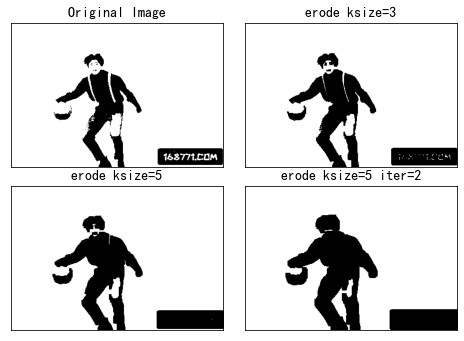

In [9]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/caixukun.jpg',0)
_,img = cv2.threshold(img,127,255,0) 

kernel = np.ones((3, 3), np.uint8)
img_ret1 = cv2.erode(img,kernel,iterations=1)
kernel = np.ones((5, 5), np.uint8)
img_ret2 = cv2.erode(img,kernel,iterations=1)
img_ret3 = cv2.erode(img,kernel,iterations=2) #ksize=7x7，腐蚀2次


titles = ['Original Image', 'erode ksize=3',
          'erode ksize=5', 'erode ksize=5 iter=2']
images = [img, img_ret1, img_ret2, img_ret3]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.subplots_adjust(wspace =0.1, hspace =-0.4)#调整子图间距
plt.show()


从运行结果可以看到kernel的ksize越大，iterations次数越多，图像看起来越“廋”。 

## 1.2 膨胀dilate() 
膨胀是腐蚀的逆操作，可以将边界的白色（前景）像素“生长”扩大。滑动窗口经过白色像素时，只要结构元中有1个像素为“1”时，新图像中该像素点的值就为“1”（CV8U为255）。膨胀可以用来增强连接、填充凹痕。

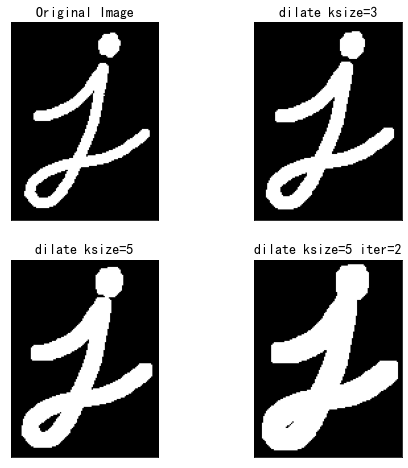

In [8]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/j.png',0)
_,img = cv2.threshold(img,127,255,0) 

kernel = np.ones((3, 3), np.uint8)
img_ret1 = cv2.dilate(img,kernel,iterations=1)
kernel = np.ones((5, 5), np.uint8)
img_ret2 = cv2.dilate(img,kernel,iterations=1)
img_ret3 = cv2.dilate(img,kernel,iterations=2) #ksize=7x7，腐蚀2次


titles = ['Original Image', 'dilate ksize=3',
          'dilate ksize=5', 'dilate ksize=5 iter=2']
images = [img, img_ret1, img_ret2, img_ret3]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


从运行结果可以看到kernel的ksize越大，iterations次数越多，图像看起来越“胖”。 

In [ ]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/notes.png',0)
_,img_bin = cv2.threshold(img,127,255,1)#二值反色

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(1,7))
img_erode = cv2.erode(img_bin,kernel,iterations=1) 
img_dilate = cv2.dilate(img_erode,kernel,iterations=1)


titles = ['Original Image', 'img_erode','img_dilate']
images = [img, img_erode, img_dilate]

for i in range(3):
    plt.subplot(3, 1, i + 1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.subplots_adjust(wspace =0, hspace =-0.7)#调整子图间距
plt.show()


## 1.3 开操作 morphologyEx() 

开操作的实质是先进行腐蚀再膨胀，可以用来消除小于结构元大小的细小区域。

img_diff = cv2.absdiff(img_dilate,img_open)得到的2幅图像的差异

再用cv2.countNonZero(img_diff)统计差异图像的非0值，得到的数值为0，可以看到2个图像是完全相同的

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/notes.png',0)
_,img_bin = cv2.threshold(img,127,255,1)#二值反色

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(1,7))
img_erode = cv2.erode(img_bin,kernel,iterations=1) 
img_dilate = cv2.dilate(img_erode,kernel,iterations=1) 
img_open = cv2.morphologyEx(img_bin,cv2.MORPH_OPEN,kernel,iterations=1)
img_diff = cv2.absdiff(img_dilate,img_open)
print('countNonZero(img_diff):',cv2.countNonZero(img_diff))


titles = ['Original Image', "img_erode",'img_dilate','img_open']
images = [img, img_erode, img_dilate,img_open]

for i in range(4):
    plt.subplot(4, 1, i + 1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.subplots_adjust(wspace =0, hspace =-0.6)#调整子图间距
plt.show()

## 1.4 闭操作  morphologyEx()

闭操作实际上是先进行膨胀再腐蚀，因为膨胀可以用来填充孔洞、修复缺失的连接，但是同时也会导致白色轮廓增大，当用同样的结构元(kernel)再进行一次腐蚀操作后，就可以保持外形轮廓和原来的一致。

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/j.png',0)

_,img_bin = cv2.threshold(img,127,255,0) 
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(11,11))
img_dilate = cv2.dilate(img_bin,kernel,iterations=1) 
img_erode = cv2.erode(img_dilate,kernel,iterations=1) 
img_close = cv2.morphologyEx(img_bin,cv2.MORPH_CLOSE,kernel,iterations=1)
img_diff = cv2.absdiff(img_close,img_close)
print('countNonZero(img_diff):',cv2.countNonZero(img_diff))


titles = ['Original Image', "img_dilate",'img_erode','img_close']
images = [img, img_dilate, img_erode,img_close]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()

## 1.5 形态学梯度  

形态学梯度操作是用膨胀图像减去腐蚀图像的结果，因为膨胀可以增大边沿，腐蚀会缩小边沿，所以形态学梯度变换就能将轮廓提取出来

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/j.png',0)

_,img_bin = cv2.threshold(img,127,255,0) 
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(9,9))
img_dilate = cv2.dilate(img_bin,kernel,iterations=1) 
img_erode = cv2.erode(img_bin,kernel,iterations=1) 
img_dilate_erode = img_dilate - img_erode
img_gradient = cv2.morphologyEx(img_bin,cv2.MORPH_GRADIENT,kernel,iterations=1)


titles = ['Original Image', "img_dilate",'img_erode','img_gradient']
images = [img, img_dilate, img_erode,img_close]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()

## 1.6 顶帽 
顶帽变换是用原图减去开操作图像，因为开操作会去除小于结构元的小区域，原图减去开操作图像后，会将开操作去除的小区域保留下来。 

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/j.png',0)

_,img_bin = cv2.threshold(img,127,255,0) 
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(11,11))
img_open = cv2.morphologyEx(img_bin,cv2.MORPH_OPEN,kernel,iterations=1)
img_src_open = img_bin - img_open
img_tophat = cv2.morphologyEx(img_bin,cv2.MORPH_TOPHAT,kernel,iterations=1)


titles = ['Original Image', "img_open",'img_src_open','img_tophat']
images = [img, img_open, img_src_open,img_tophat]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()

## 1.7 黑帽 
黑帽变换和顶帽变换则相反，是将闭操作后的图像减去原图，因为闭操作会填充孔洞（小的黑色区域），孔洞部分变成白色，而原图中仍然为黑色，这样就会将原图中的孔洞保留下来并变为白色区域

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/j.png',0)

_,img_bin = cv2.threshold(img,127,255,0)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(11,11))
img_close = cv2.morphologyEx(img_bin,cv2.MORPH_CLOSE,kernel,iterations=1)
img_close_src = img_close-img_bin
img_blackhat = cv2.morphologyEx(img_bin,cv2.MORPH_BLACKHAT,kernel,iterations=1)


titles = ['Original Image', "img_close",'img_close_src','img_blackhat']
images = [img, img_close, img_close_src,img_blackhat]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()